In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Customer%20Segmentation/train.csv?raw=True')

In [3]:
customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
customer.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
customer.drop(['ID','Var_1','Segmentation','Profession'],axis=1,inplace=True)

In [7]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,1.0,Low,4.0
1,Female,Yes,38,Yes,NaN,Average,3.0
2,Female,Yes,67,Yes,1.0,Low,1.0
3,Male,Yes,67,Yes,0.0,High,2.0
4,Female,Yes,40,Yes,NaN,High,6.0


In [8]:
customer['Spending_Score'] = customer['Spending_Score'].map({'Low':0,'Average':1,'High':2})

In [9]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,1.0,0,4.0
1,Female,Yes,38,Yes,NaN,1,3.0
2,Female,Yes,67,Yes,1.0,0,1.0
3,Male,Yes,67,Yes,0.0,2,2.0
4,Female,Yes,40,Yes,NaN,2,6.0


In [10]:
customer.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

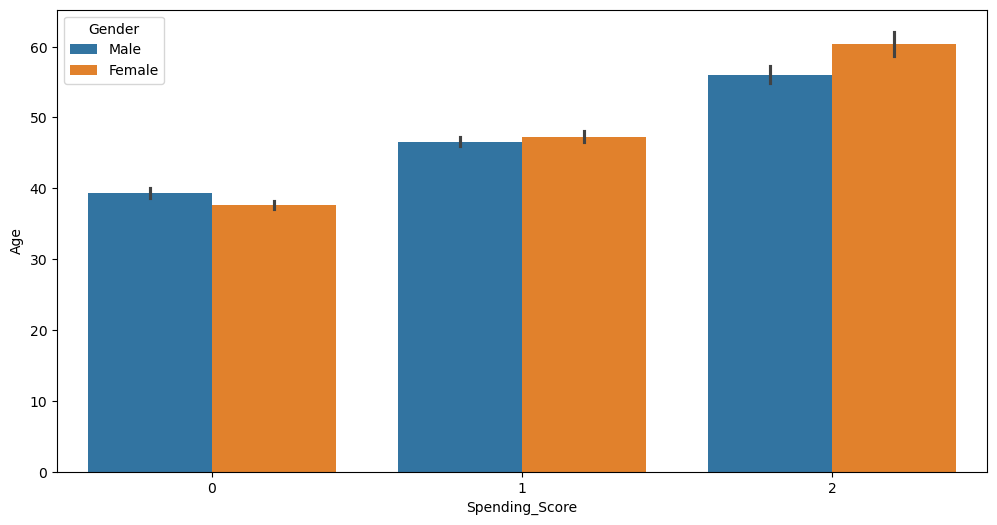

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data = customer , x='Spending_Score',y='Age',hue='Gender')
plt.show()

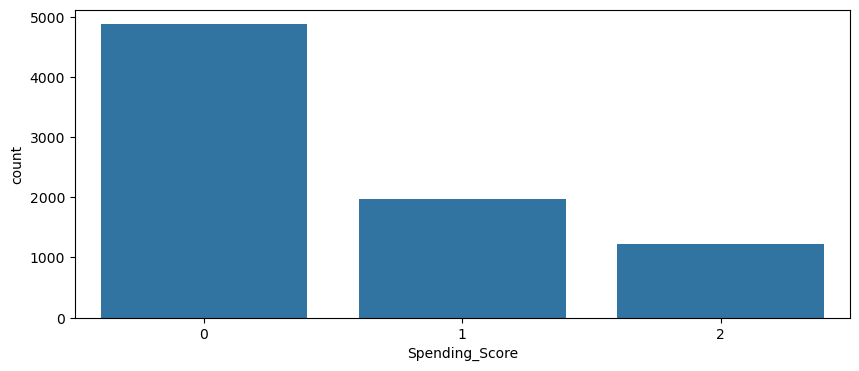

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=customer,x='Spending_Score')
plt.show()

In [13]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,1.0,0,4.0
1,Female,Yes,38,Yes,NaN,1,3.0
2,Female,Yes,67,Yes,1.0,0,1.0
3,Male,Yes,67,Yes,0.0,2,2.0
4,Female,Yes,40,Yes,NaN,2,6.0


In [14]:
customer = customer.dropna()

In [15]:
customer = customer.reset_index(drop =True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

In [17]:
label_encode.fit(customer['Gender'])

LabelEncoder()

In [18]:
customer['Gender'] = label_encode.transform(customer['Gender'])

In [19]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,1,No,22,No,1.0,0,4.0
1,0,Yes,67,Yes,1.0,0,1.0
2,1,Yes,67,Yes,0.0,2,2.0
3,1,Yes,56,No,0.0,1,2.0
4,1,No,32,Yes,1.0,0,3.0


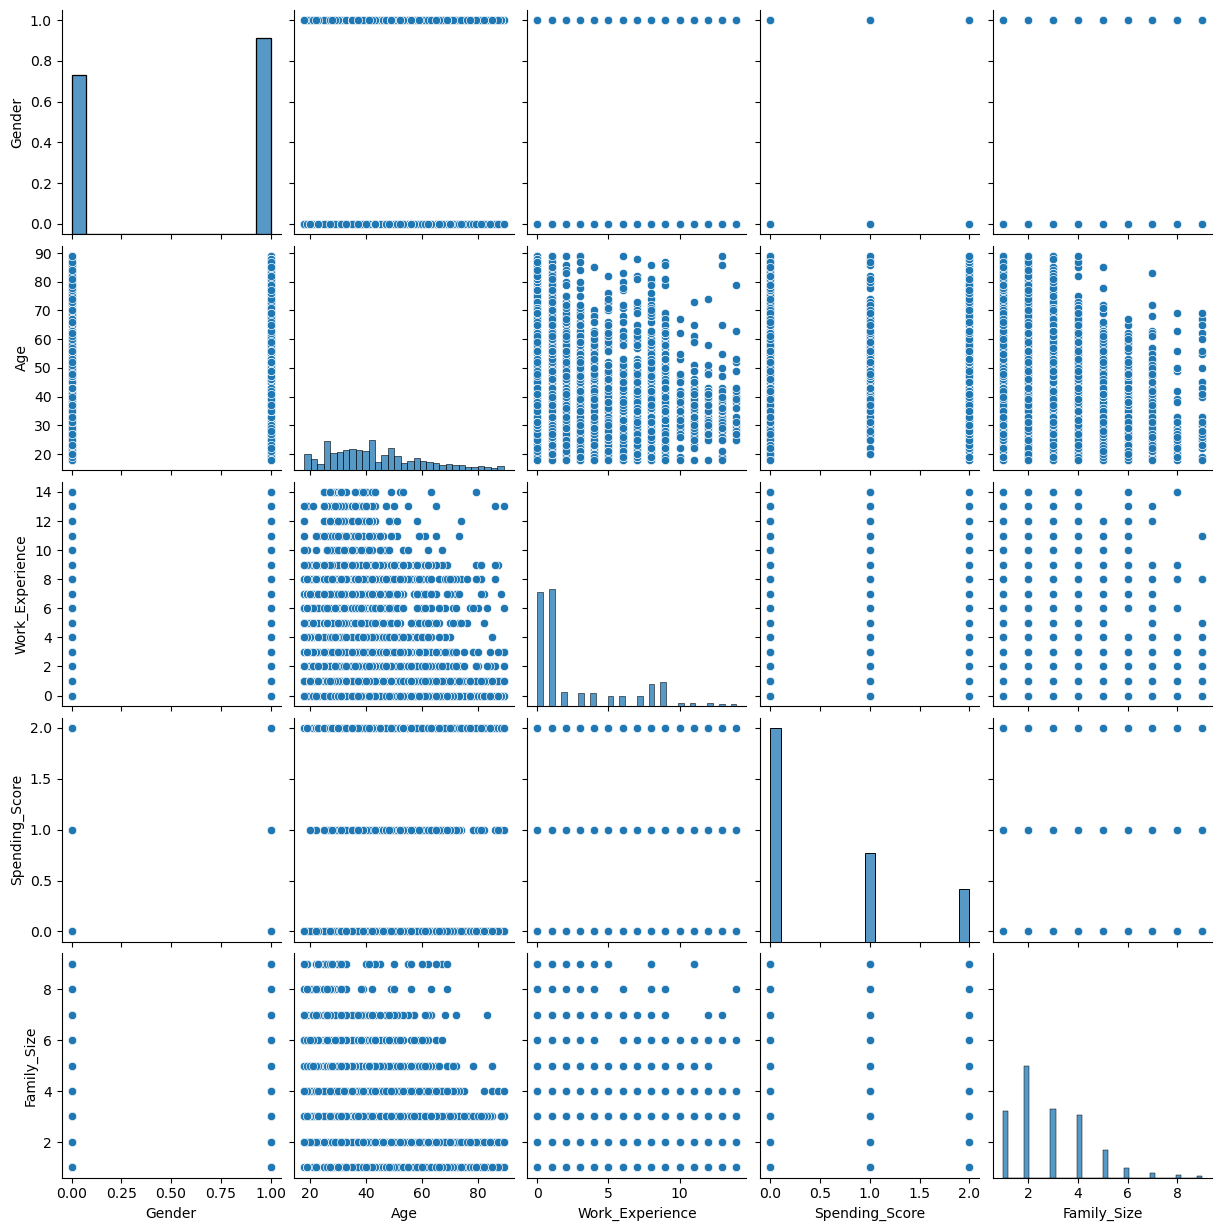

In [20]:
sns.pairplot(customer)

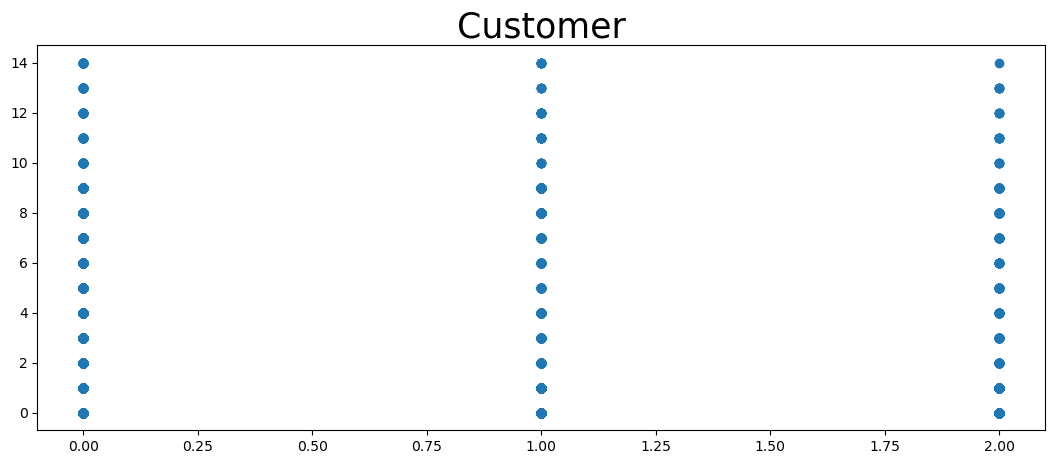

In [21]:
plt.figure(figsize=(13,5))
plt.scatter(customer['Spending_Score'],customer['Work_Experience'])
plt.title('Customer',size=25)
plt.show()

In [22]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,1,No,22,No,1.0,0,4.0
1,0,Yes,67,Yes,1.0,0,1.0
2,1,Yes,67,Yes,0.0,2,2.0
3,1,Yes,56,No,0.0,1,2.0
4,1,No,32,Yes,1.0,0,3.0


In [23]:
from sklearn.cluster import KMeans

k_means = KMeans (n_clusters=3)

In [24]:
k_means.fit(customer[['Spending_Score','Family_Size']])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
customer['Clusters'] = k_means.predict(customer[['Spending_Score','Family_Size']])

In [26]:
customer

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Clusters
0,1,No,22,No,1.0,0,4.0,0
1,0,Yes,67,Yes,1.0,0,1.0,1
2,1,Yes,67,Yes,0.0,2,2.0,1
3,1,Yes,56,No,0.0,1,2.0,1
4,1,No,32,Yes,1.0,0,3.0,0
...,...,...,...,...,...,...,...,...
6800,1,No,22,No,0.0,0,7.0,2
6801,1,No,35,No,3.0,0,4.0,0
6802,0,No,33,Yes,1.0,0,1.0,1
6803,0,No,27,Yes,1.0,0,4.0,0


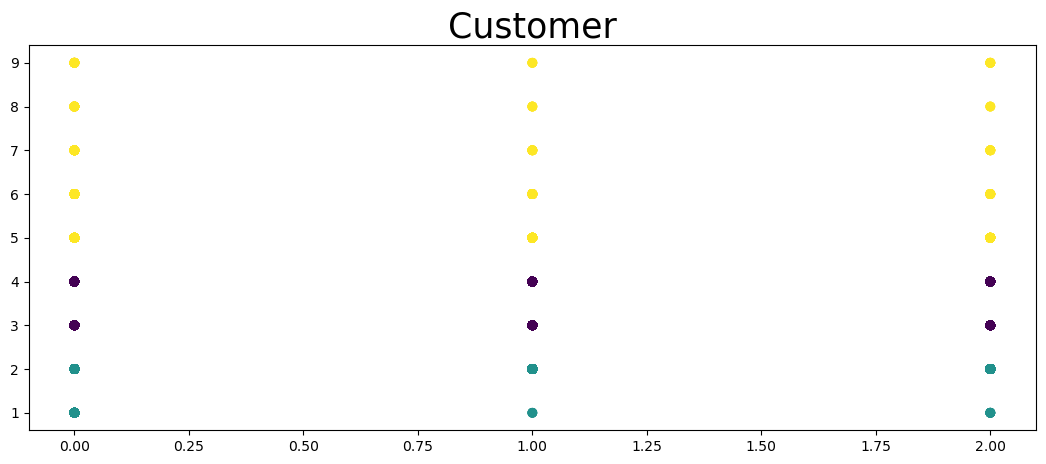

In [27]:
plt.figure(figsize=(13,5))
plt.scatter(customer['Spending_Score'],customer['Family_Size'],c=customer['Clusters'])
plt.title('Customer',size=25)
plt.show()